In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/healthcare-dataset-stroke-data.csv')

In [152]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [153]:
df.shape

(5110, 12)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [155]:
df.isnull().mean() *100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [156]:
df.drop(columns='id',inplace=True)

In [157]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [158]:
df.select_dtypes(exclude='number').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

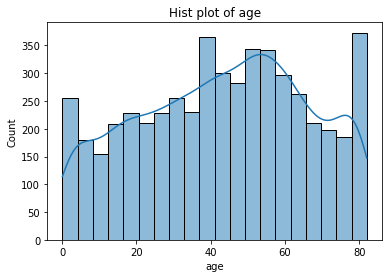

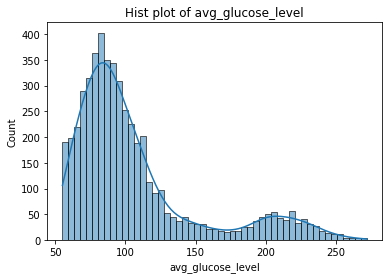

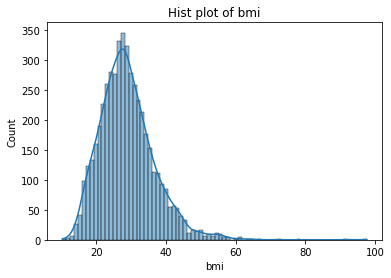

--------------------------------------------------


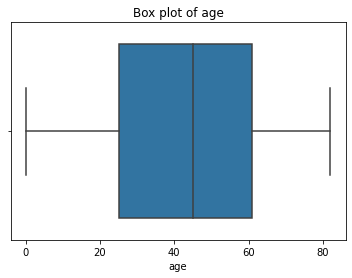

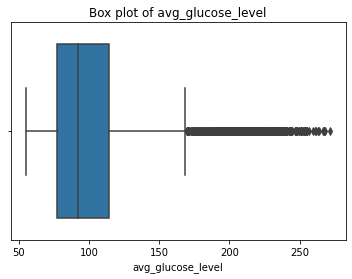

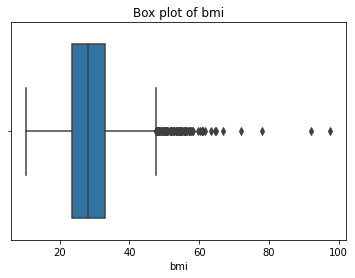

--------------------------------------------------


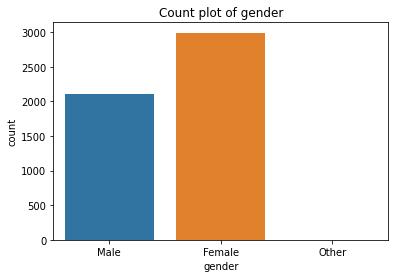

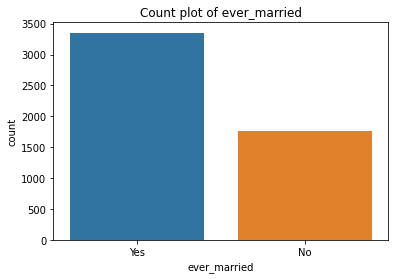

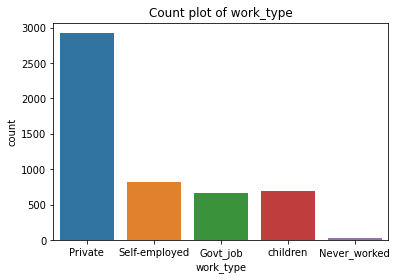

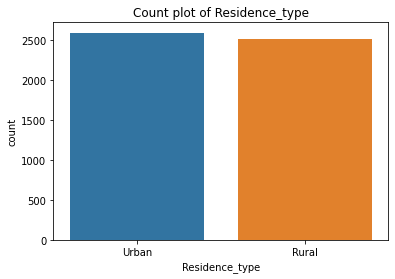

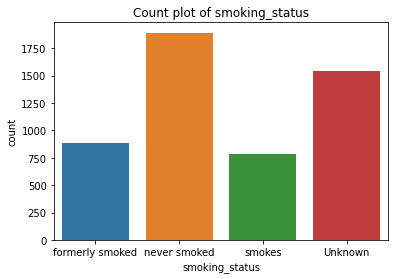

--------------------------------------------------


In [159]:
import seaborn as sns
#Univariate

numerical_columns = ['age','avg_glucose_level', 'bmi',]
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

for col in numerical_columns:
    sns.histplot(df[col],kde=True)
    plt.title(f"Hist plot of {col}")
    plt.show()
print('-'*50)

for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

print('-'*50)

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

print('-'*50)

In [160]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [161]:
from sklearn.impute import SimpleImputer

bmi_impute = SimpleImputer(strategy='median')
df['bmi'] = bmi_impute.fit_transform(df[['bmi']])

mode_value = df['smoking_status'].mode()[0]
df['smoking_status'].fillna(mode_value, inplace=True)


In [162]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [163]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [164]:
X = df.drop(columns='stroke',axis=1)
y = df['stroke']

In [165]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [166]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [168]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked
3927,Female,62.0,0,0,Yes,Private,Urban,88.32,36.3,Unknown
2337,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked
3910,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked
1886,Female,31.0,0,0,No,Private,Rural,59.63,19.9,never smoked


In [169]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

ohe_encode_columns = ['gender','ever_married','work_type','Residence_type','smoking_status']
standard_scaler_columns = ['age','avg_glucose_level','bmi']
outlier_columns = ['avg_glucose_level','bmi']
numerical_columns = ['age','avg_glucose_level', 'bmi']
categorical_columns = ['work_type', 'Residence_type','smoking_status']

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
scalar = StandardScaler()
robust_scale = RobustScaler()
num_impute = SimpleImputer(strategy='median')
cat_impute = SimpleImputer(strategy='most_frequent')


col_transform = ColumnTransformer(
    transformers= [
        # ('num_impute',SimpleImputer(strategy='median'),numerical_columns),
        # ('cat_impute',cat_impute,categorical_columns),
        ('outlier',robust_scale,outlier_columns),
        ('ohe_columns',ohe,ohe_encode_columns),
        ('scaler',scalar,standard_scaler_columns),
        
    ],remainder='passthrough'
)

In [170]:
from sklearn.pipeline import Pipeline
from sklearn import set_config


set_config(display = 'diagram')

preprocess_pipepline = Pipeline(
    steps= [
        ('preprocess',col_transform)
    ]
)

In [171]:
preprocess_pipepline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('outlier', RobustScaler(),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('ohe_columns',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])]))])

In [172]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib

algorithms = {
    "random_forest": RandomForestClassifier(class_weight='balanced'),
    "decision_tree": DecisionTreeClassifier(class_weight='balanced'),
    "svm": SVC(class_weight='balanced'),
    "lr": LogisticRegression(class_weight='balanced'),
    "gb": GradientBoostingClassifier(),
    "xgb": xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
}


results = {}
piepline_resulsts = {}

for name,algo in algorithms.items():
    piepline = Pipeline(
        steps= [
            ('preprocess',preprocess_pipepline),
            ('algo',algo)
        ]
    )
    piepline.fit(X_train,y_train)

    joblib.dump(piepline,f"{name}.pkl")
    piepline_resulsts[name] = piepline

    y_pred = piepline.predict(X_test)



    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred,zero_division=1)
    cf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(piepline,X_train,y_train,cv=5,scoring='accuracy')
    cv_mean = cv_score.mean()

    results[name]  = {
        "accuracy": accuracy,
        "clf_report": clf_report,
        "cf_matrix": cf_matrix,
        "cv_score": cv_score,
        "cv_mean": cv_mean
    }

    print(f"{name}")
    print(f"Accuracy : {accuracy}")
    print(f"clf report : \n{clf_report}")
    print(f"cf matrix: \n{cf_matrix}")
    print(f"cv : {cv_score}")
    print(f"cv_mean : {cv_mean}")
    print('-'*50)




random_forest
Accuracy : 0.9393346379647749
clf report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022

cf matrix: 
[[960   0]
 [ 62   0]]
cv : [0.95599022 0.95354523 0.95354523 0.95471236 0.95348837]
cv_mean : 0.9542562837981403
--------------------------------------------------
decision_tree
Accuracy : 0.9178082191780822
clf report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.25      0.18      0.21        62

    accuracy                           0.92      1022
   macro avg       0.60      0.57      0.58      1022
weighted avg       0.91      0.92      0.91      1022

cf matrix: 
[[927  33]
 [ 51  11]]
cv : [0.93398533 0

## Using SMOTE

In [173]:
# # %%
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as imblearnPipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import joblib

# # %%
# # Load dataset
# df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/healthcare-dataset-stroke-data.csv')

# # %%
# # Drop ID column as it is not useful
# df.drop(columns='id', inplace=True)

# # %%
# # Check missing values and handle them
# df['bmi'] = df['bmi'].fillna(df['bmi'].median())  # Impute bmi with median
# df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)  # Impute smoking_status with mode

# # %%
# # Separate features and target variable
# X = df.drop(columns='stroke', axis=1)
# y = df['stroke']

# # %%
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # %%
# # Columns to apply transformations
# ohe_encode_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# standard_scaler_columns = ['age', 'avg_glucose_level', 'bmi']
# outlier_columns = ['avg_glucose_level', 'bmi']

# # %%
# # Define preprocessing transformers
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# scalar = StandardScaler()
# robust_scale = RobustScaler()

# # %%
# # Column transformer to preprocess data
# col_transform = ColumnTransformer(
#     transformers=[
#         ('outlier', robust_scale, outlier_columns),
#         ('ohe_columns', ohe, ohe_encode_columns),
#         ('scaler', scalar, standard_scaler_columns)
#     ], remainder='passthrough'
# )

# # %%
# # Define algorithms to be used
# algorithms = {
#     "random_forest": RandomForestClassifier(class_weight='balanced'),
#     "decision_tree": DecisionTreeClassifier(class_weight='balanced'),
#     "svm": SVC(class_weight='balanced'),
#     "lr": LogisticRegression(class_weight='balanced'),
#     "gb": GradientBoostingClassifier(),
#     "xgb": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# }

# # %%
# # Define results dictionary
# results = {}
# piepline_resulsts = {}

# # %%
# # Iterate over each algorithm and train the model with resampling
# for name, algo in algorithms.items():
#     # Create pipeline with preprocessing, SMOTE, and classifier
#     model_pipeline = imblearnPipeline(
#         steps=[
#             ('preprocess', col_transform),
#             ('smote', SMOTE(sampling_strategy='minority')),  # Apply SMOTE after preprocessing
#             ('algo', algo)
#         ]
#     )
    
#     # Train the model with resampled data
#     model_pipeline.fit(X_train, y_train)

#     # Save model pipeline
#     joblib.dump(model_pipeline, f"{name}.pkl")
#     piepline_resulsts[name] = model_pipeline

#     # Make predictions
#     y_pred = model_pipeline.predict(X_test)

#     # Calculate accuracy and metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     clf_report = classification_report(y_test, y_pred, zero_division=1)
#     cf_matrix = confusion_matrix(y_test, y_pred)
#     cv_score = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
#     cv_mean = cv_score.mean()

#     # Store results
#     results[name] = {
#         "accuracy": accuracy,
#         "clf_report": clf_report,
#         "cf_matrix": cf_matrix,
#         "cv_score": cv_score,
#         "cv_mean": cv_mean
#     }

#     # Print results
#     print(f"{name}")
#     print(f"Accuracy : {accuracy}")
#     print(f"clf report : \n{clf_report}")
#     print(f"cf matrix: \n{cf_matrix}")
#     print(f"cv : {cv_score}")
#     print(f"cv_mean : {cv_mean}")
#     print('-' * 50)

